Quantidade de nós no grafo: 4575
Número de comunidades detectadas: 809
Número de nós nas 10 maiores comunidades:
Comunidade 0: 910 nós
Comunidade 7: 849 nós
Comunidade 2: 739 nós
Comunidade 4: 630 nós
Comunidade 59: 125 nós
Comunidade 1: 86 nós
Comunidade 51: 50 nós
Comunidade 23: 46 nós
Comunidade 10: 34 nós
Comunidade 173: 31 nós


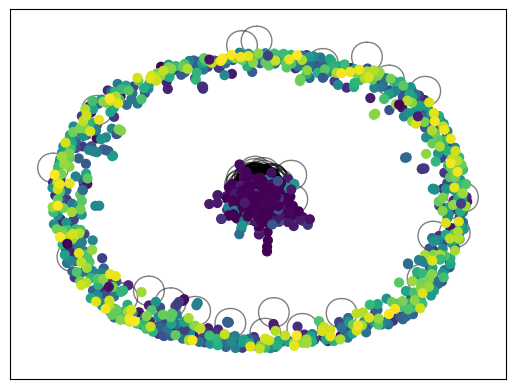

In [13]:
# Definicao de comunidades usando louvain, calculo do numero de comunidades,
# calculo do numero de nós por comunidade, e plot das comunidades

import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

file_path = "GraphMissingEdges.gml"
G = nx.read_gml(file_path)

num_nos = G.number_of_nodes()
print("Quantidade de nós no grafo:", num_nos)

partition = community_louvain.best_partition(G)
num_comunidades = len(set(partition.values()))
print("Número de comunidades detectadas:", num_comunidades)

# Contar o número de nós em cada comunidade
comunidades = defaultdict(int)
for node, community_id in partition.items():
    comunidades[community_id] += 1

# Obter as 10 maiores comunidades
top_10_comunidades = sorted(comunidades.items(), key=lambda x: x[1], reverse=True)[:10]

# Exibir o número de nós nas 10 maiores comunidades
print("Número de nós nas 10 maiores comunidades:")
for community_id, num_nodes in top_10_comunidades:
    print(f"Comunidade {community_id}: {num_nodes} nós")

pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

NetworkXError: Node '3kUqNxO1rkDDb89GAfyNgw' has no position.

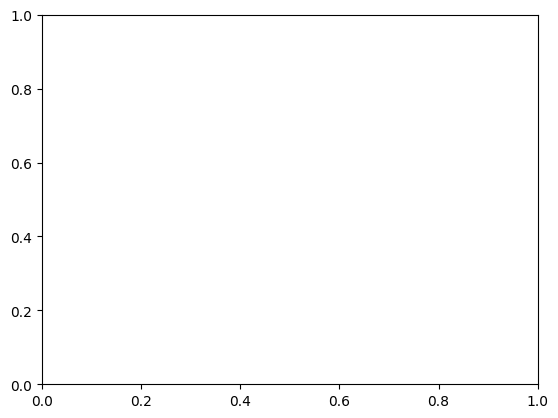

In [18]:
# Plot das 4 maiores comunidades - rede reduzida

# Obter as 4 maiores comunidades
top_4_comunidades = sorted(comunidades.items(), key=lambda x: x[1], reverse=True)[:4]

# Criar um conjunto contendo os nós das 4 maiores comunidades
nos_top_4_comunidades = set()
for community_id, _ in top_4_comunidades:
    nos_top_4_comunidades.update(node for node, cid in partition.items() if cid == community_id)

# Criar um subgrafo contendo apenas os nós das 4 maiores comunidades
subgrafo = G.subgraph(nos_top_4_comunidades)

# Plotar o subgrafo
pos = nx.spring_layout(subgrafo)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(subgrafo, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(subgrafo, pos, alpha=0.5)

plt.show()

In [ ]:
import leidenalg as la
import igraph as ig

# Converte o grafo NetworkX para igraph
G_igraph = ig.Graph.from_networkx(G)

# partition_leiden = G_igraph.community_leiden()
# print("Comunidades detectadas usando Leiden:", partition_leiden)

partition = la.find_partition(G_igraph, la.ModularityVertexPartition)
ig.plot(partition) 